In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt

%matplotlib inline

Read the dataset, parse the transactions, and create a dataframe

In [2]:
with open('CDNOW_master.txt') as f:
    dataset = f.read().split("\n")

In [3]:
records = []
for line in dataset:
    if line == '':
        continue
    row = list(filter(lambda token: token != '', line.split(' ')))
    rec = {}
    rec['customerID'] = row[0]
    rec['purchaseDate'] = datetime.strptime(row[1], '%Y%m%d')
    rec['quantity'] = int(row[2])
    rec['price'] = float(row[3])
    records.append(rec)
transactions_df = pd.DataFrame(records)

In [4]:
transactions_df

,customerID,purchaseDate,quantity,price
0,00001,1997-01-01,1,11.77
1,00002,1997-01-12,1,12.00
2,00002,1997-01-12,5,77.00
3,00003,1997-01-02,2,20.76
4,00003,1997-03-30,2,20.76
...,...,...,...,...
69654,23568,1997-04-05,4,83.74
69655,23568,1997-04-22,1,14.99
69656,23569,1997-03-25,2,25.74
69657,23570,1997-03-25,3,51.12


Calculate purchase frequency per customer

In [5]:
transactions_per_customer = transactions_df.groupby('customerID')['purchaseDate'].count()
avg_frequency = transactions_per_customer.mean()

Calculate lifespan for each customer

In [6]:
minmax_purchase_dates_by_customer = transactions_df.groupby('customerID')['purchaseDate'].agg(['min','max'])

In [7]:
customer_lifetimes = minmax_purchase_dates_by_customer.apply(lambda row: (row['max'] - row['min']).days, axis=1)
avg_lifetime = customer_lifetimes.mean()

Calculate average monetary value per sale

In [8]:
transactions_df['total'] = transactions_df['price'] * transactions_df['quantity']

In [9]:
avg_order_value = transactions_df['total'].mean()

Customer lifetime value

In [10]:
avg_frequency * avg_lifetime * avg_order_value

64906.257791258744

In [11]:
avg_order_value_per_customer = transactions_df.groupby('customerID')['total'].mean()

In [12]:
avg_order_value_per_customer.describe()

count    23570.000000
mean       132.454416
std        534.483751
min          0.000000
25%         15.360000
50%         45.480000
75%        112.900089
max      35829.760000
Name: total, dtype: float64

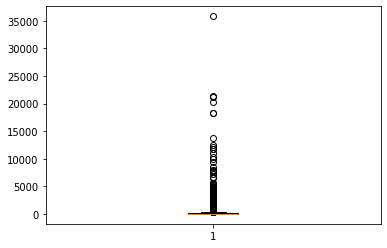

In [13]:
plt.boxplot(avg_order_value_per_customer);